<a href="https://colab.research.google.com/github/yun890503/titanic-analysis/blob/main/%E5%B0%88%E9%A1%8C%E5%AF%A6%E4%BD%9C_01_titanic_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

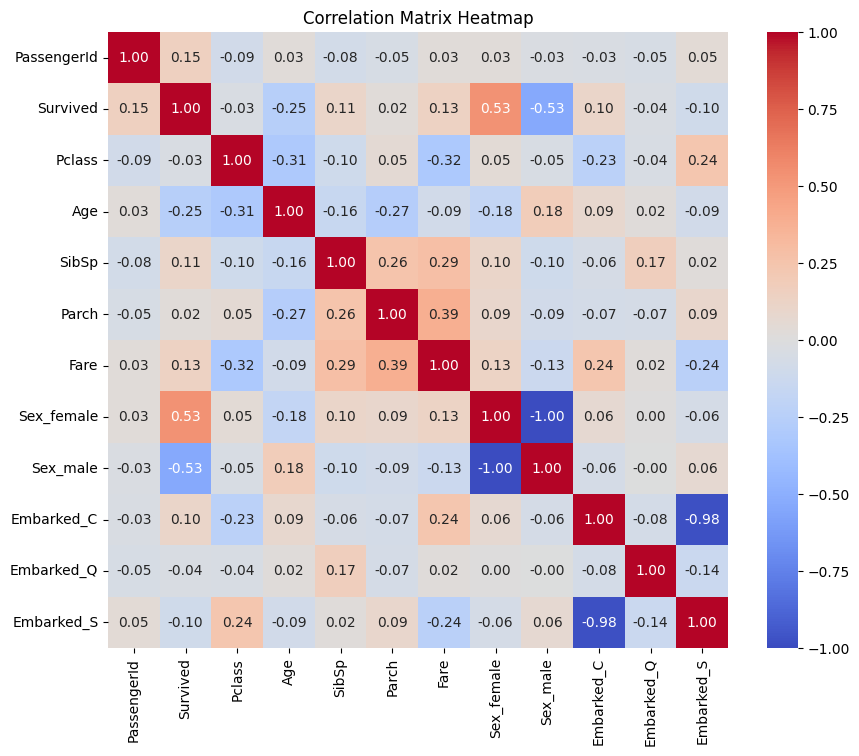

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Sex_female      1
Sex_male        2
Embarked_C      3
Embarked_Q      4
SibSp           5
Pclass          6
Parch           7
Age             8
Embarked_S      9
PassengerId    10
Fare           11
dtype: int64
平均準確率： 0.737087087087087
----------------------------------------------------------------------------------
Age            0.221231
Fare           0.207558
PassengerId    0.189116
Sex_female     0.129106
Sex_male       0.121741
Parch          0.037529
SibSp          0.032526
Pclass         0.024836
Embarked_C     0.018682
Embarked_S     0.015128
Embarked_Q     0.002547
dtype: float64
平均準確率： 0.6391891891891893
----------------------------------------------------------------------------------


In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#2. 請根據 Kaggle 文件瞭解 Titanic 資料中所有欄位的定義為何？

#PassengerId（乘客ID）：乘客的唯一識別號碼。
#Survived（生存狀態）：乘客是否生還。0代表未生還，1代表生還。
#Pclass（艙等）：乘客所在的艙等。1代表頭等艙，2代表二等艙，3代表三等艙。
#Name（姓名）：乘客的姓名。
#Sex（性別）：乘客的性別。
#Age（年齡）：乘客的年齡。
#SibSp（同船的兄弟姊妹/配偶數量）：乘客在船上同時有多少兄弟姊妹或配偶。
#Parch（同船的父母/子女數量）：乘客在船上同時有多少父母或子女。
#Ticket（船票號碼）：乘客的船票號碼。
#Fare（票價）：乘客支付的票價。
#Cabin（客艙號碼）：乘客所在的客艙號碼。
#Embarked（登船港口）：乘客登船的港口。C代表Cherbourg，Q代表Queenstown，S代表Southampton。

df=pd.read_csv('https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv')
# 刪除含有缺失值的列
df = df.dropna()
# 刪除不必用的列
df1=df.drop(['Name','Cabin','Ticket'],axis=1)
# 將非數字轉換成機器學習能懂的數字型態
df_encoded = pd.get_dummies(df1, columns=['Sex','Embarked'])
# 使用corr()進行相關性分析
correlation_matrix = df_encoded.corr()
# 設置畫布大小
plt.figure(figsize=(10, 8))
# 使用熱力圖繪製矩陣
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
# 添加標題
plt.title("Correlation Matrix Heatmap")
# 顯示圖形
plt.show()
# 從df_encoded裡去除Survived列位，並使剩下的欄位成為特徵X
X=df_encoded.drop(['Survived'],axis=1)
# 將'Survivded'作為目標y，在機器學習中通常將需要的目標變量單獨分離出來做為訓練數據的標籤
Y=df_encoded['Survived']

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# 使用遞歸特徵消除法RFE模型來評估特徵重要性，以羅吉斯回歸為例
model = LogisticRegression()
# 選擇1個最重要特徵
rfe = RFE(model, n_features_to_select=1)
fit = rfe.fit(X, Y)

# 特徵重要性排名
feature_ranking = pd.Series(fit.ranking_, index=X.columns)
print(feature_ranking.sort_values())

# 交叉驗證
from sklearn.model_selection import cross_val_score

# 進行K折交叉驗證，cv指定折數，scoring指定評估指標
scores = cross_val_score(model, X, Y, cv=5, scoring='accuracy')

# 計算平均性能
mean_score = scores.mean()
print("平均準確率：", mean_score)
print('----------------------------------------------------------------------------------')
# 回到選擇模型，這次選擇以隨機樹森森林作為模型選擇
from sklearn.ensemble import RandomForestClassifier

# 創建隨機森林模型
model = RandomForestClassifier()

# 訓練模型
model.fit(X, Y)

# 取得特徵重要性排名
feature_importance = model.feature_importances_
feature_ranking = pd.Series(feature_importance, index=X.columns).sort_values(ascending=False)
print(feature_ranking)
# 交叉驗證
from sklearn.model_selection import cross_val_score

# 進行K折交叉驗證，cv指定折數，scoring指定評估指標
scores = cross_val_score(model, X, Y, cv=5, scoring='accuracy')

# 計算平均性能
mean_score = scores.mean()
print("平均準確率：", mean_score)
print('----------------------------------------------------------------------------------')

